In [405]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
# read the train and test dataset
df_train_sales = pd.read_csv('Train.csv')
df_train_sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [407]:
df_test_sales=pd.read_csv("Test.csv")
df_test_sales.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Let's explore training data

In [361]:
df_train_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000060292D2F48>,
      dtype=object)

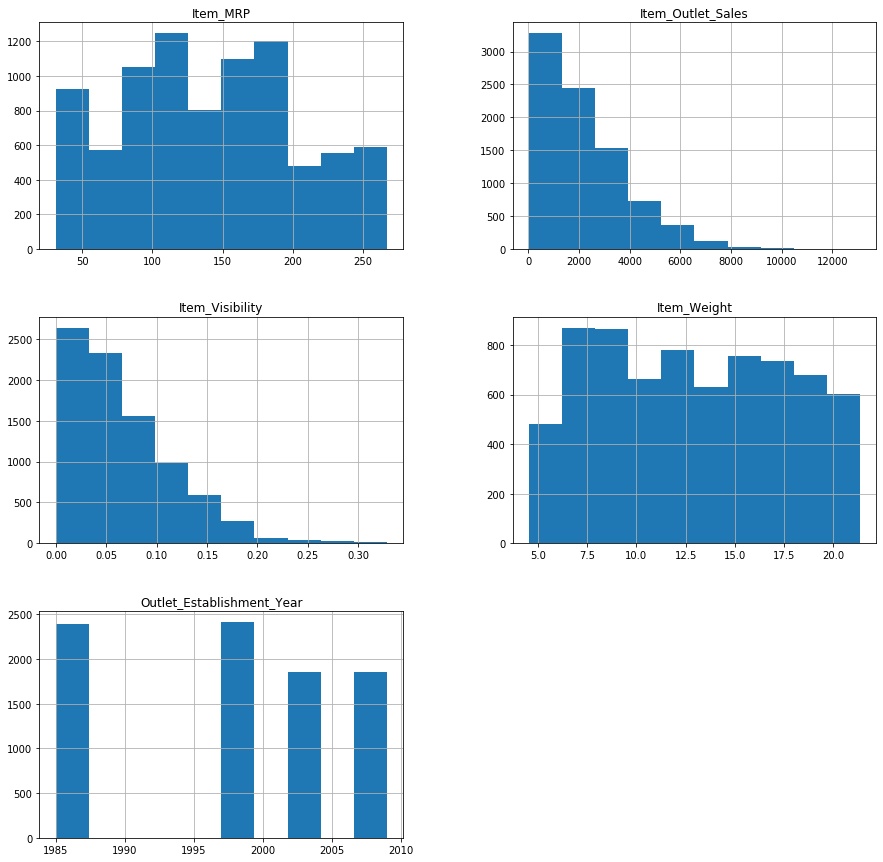

In [362]:
df_train_sales.hist(figsize=(15,15))

In [363]:
df_train_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Column ITEM WEIGHT and OUTLET SIZE contain missing values.

Lets see correlation b/w target and features


In [364]:
df_train_sales.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [365]:
corr_matrix=df_train_sales.corr()
corr_matrix['Item_Outlet_Sales']

Item_Weight                  0.014123
Item_Visibility             -0.128625
Item_MRP                     0.567574
Outlet_Establishment_Year   -0.049135
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [366]:
df_train_sales[['Item_Outlet_Sales']].corr()

,Item_Outlet_Sales
Item_Outlet_Sales,1.0


1. ITEM_MRP seems to have a good correlation with targeted  ITEM_OUTLET_SALES and other columns are not very useful for prediction of target value


2. Lets start checking columns relation with Target ITEM_OUTLET_SALES Price


3. First is ITEM_IDENTIFIER

In [367]:
df_train_sales.Item_Identifier.value_counts()

FDW13    10
FDG33    10
FDO19     9
NCI54     9
FDF56     9
         ..
FDK57     1
FDQ60     1
FDT35     1
FDE52     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64


For further data processing we need to convert column type into their correct type

In [368]:
df_train_sales.Item_Identifier=df_train_sales.Item_Identifier.astype('category')
df_train_sales.Item_Fat_Content=df_train_sales.Item_Fat_Content.astype('category')
df_train_sales.Item_Type=df_train_sales.Item_Type.astype('category')
df_train_sales.Outlet_Identifier=df_train_sales.Outlet_Identifier.astype('category')
df_train_sales.Outlet_Establishment_Year=df_train_sales.Outlet_Establishment_Year.astype('int64')

df_train_sales.Outlet_Type=df_train_sales.Outlet_Type.astype('category')
df_train_sales.Outlet_Location_Type=df_train_sales.Outlet_Location_Type.astype('category')
df_train_sales.Outlet_Size=df_train_sales.Outlet_Size.astype('category')


Now ITEM_MRP column. Correlation strength of this column with target column is very high so we need can exploit this column for further infomation about target column

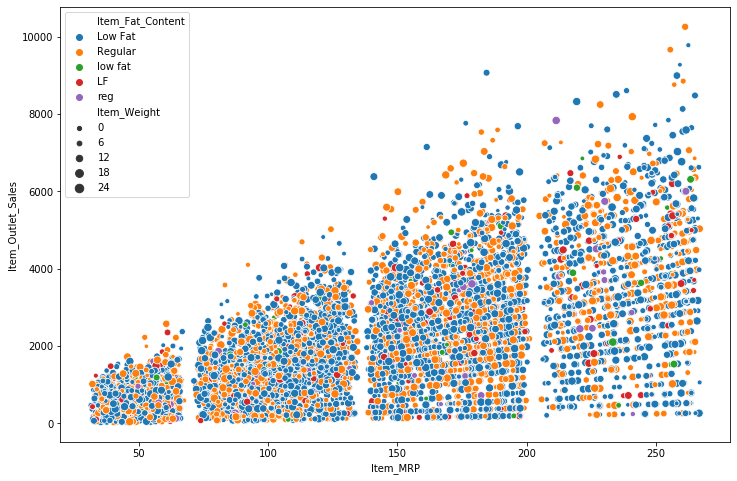

In [369]:
fig,axes=plt.subplots(1,1,figsize=(12,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df_train_sales)


ITEM_MRP column contain prices which are in clusters so it would be better if we convert this columnn into bins for further processing

In [370]:
df_train_sales.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


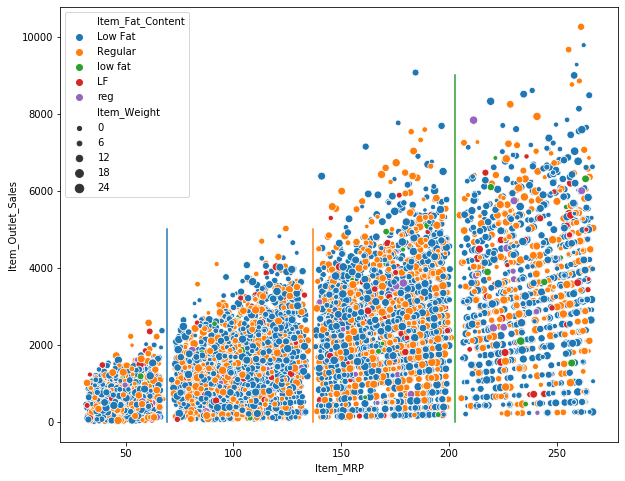

In [371]:
fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.scatterplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',size='Item_Weight',data=df_train_sales)
plt.plot([69,69],[0,5000])
plt.plot([137,137],[0,5000])
plt.plot([203,203],[0,9000])

We can use these perpendicular lines to divide data into proper bins. So from above graph we got out bin value. Now

In [372]:
df_train_sales.Item_MRP=pd.cut(df_train_sales.Item_MRP,bins=[25,69,137,203,270],labels=['a','b','c','d'],right=True)

# Now lets explore other columns

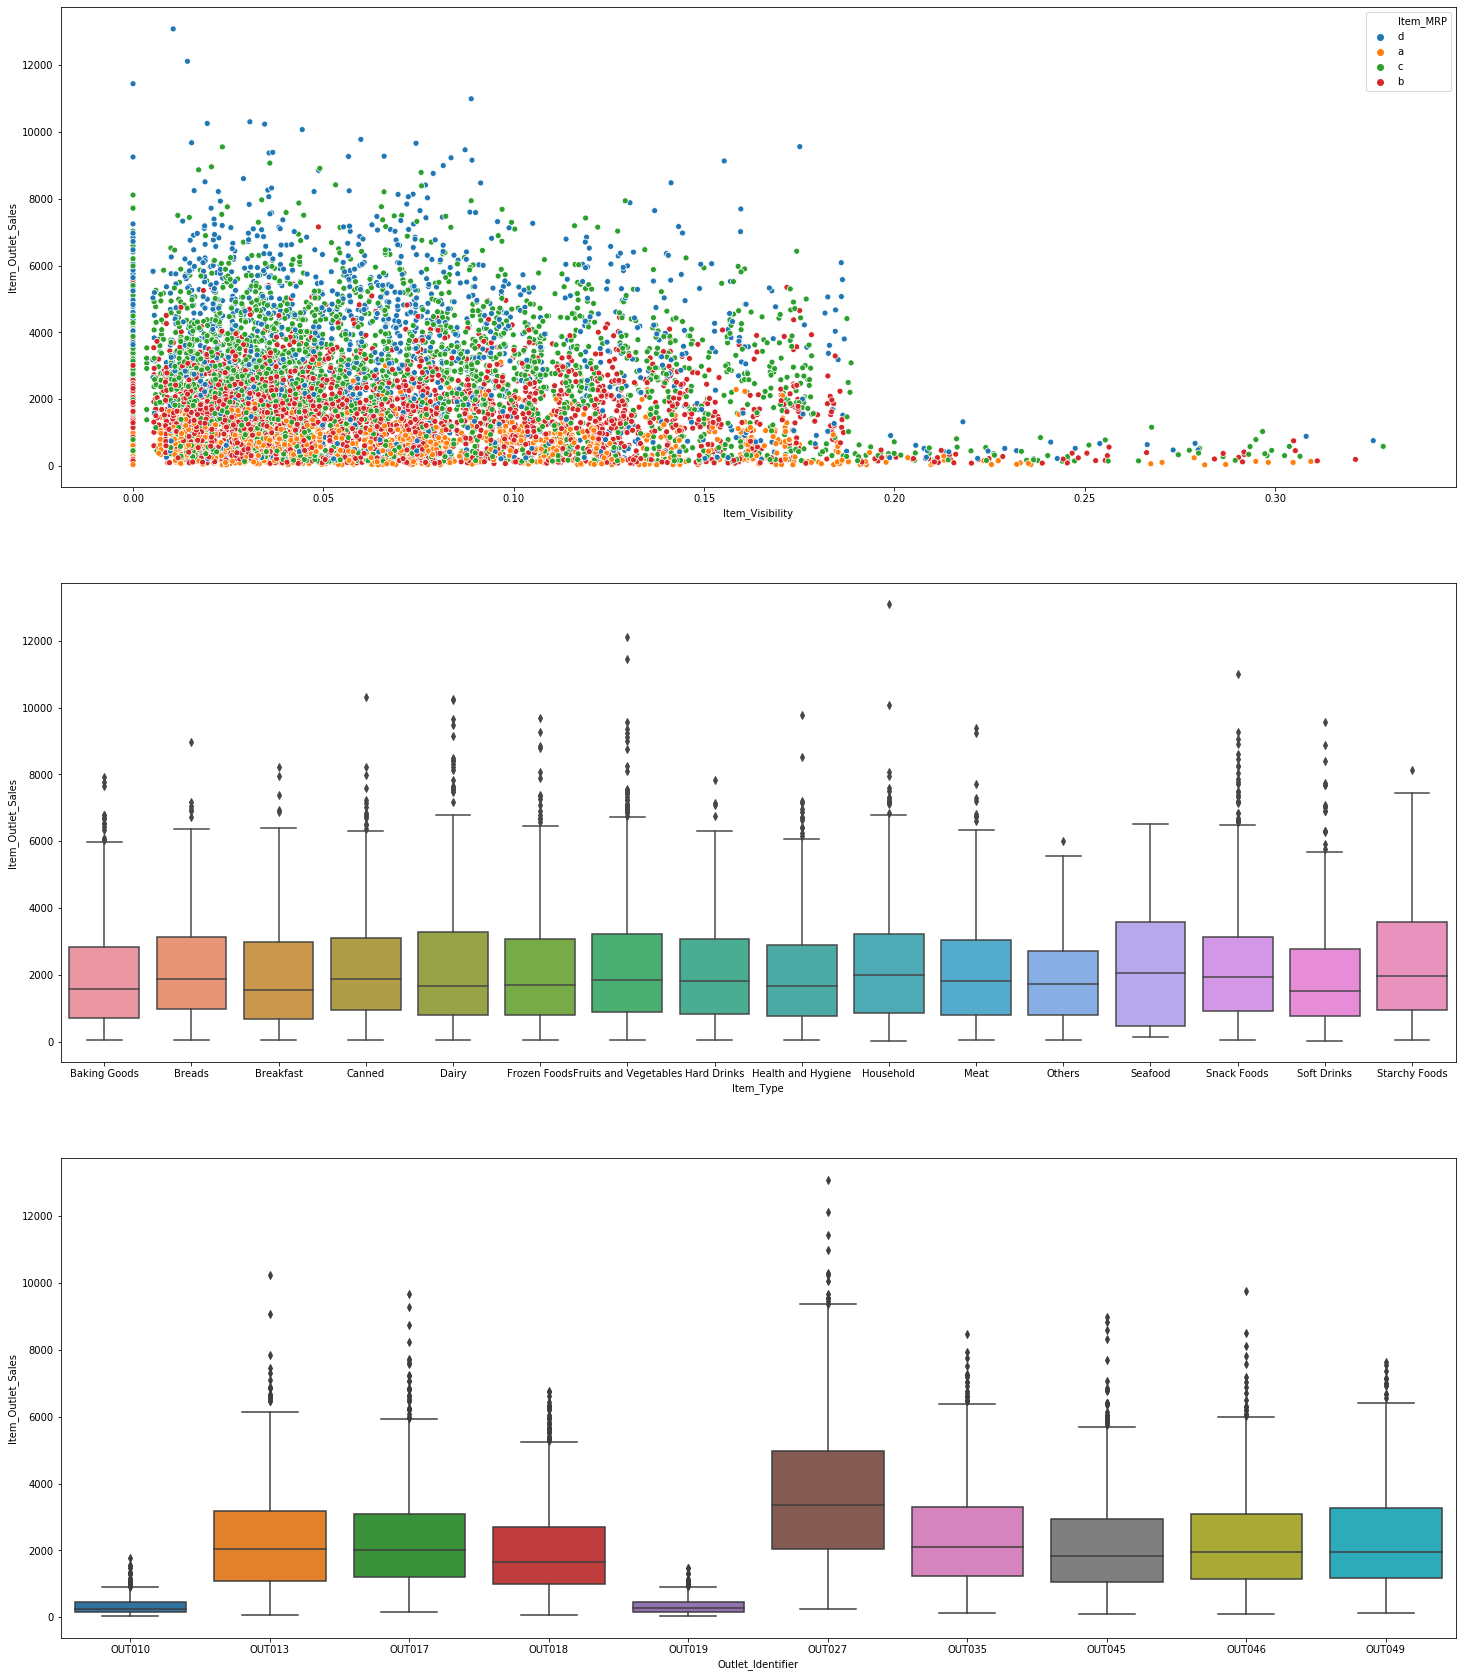

In [373]:
fig,axes=plt.subplots(3,1,figsize=(25,30))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_MRP',ax=axes[0],data=df_train_sales)
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',ax=axes[1],data=df_train_sales)
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',ax=axes[2],data=df_train_sales)

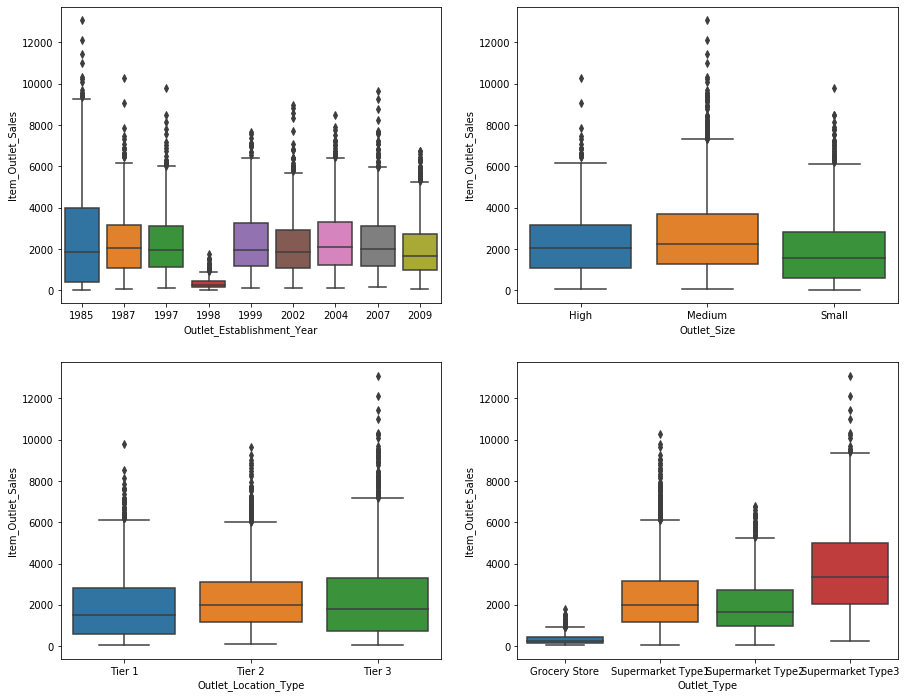

In [374]:
fig,axes=plt.subplots(2,2,figsize=(15,12))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',ax=axes[0,0],data=df_train_sales)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',ax=axes[0,1],data=df_train_sales)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',ax=axes[1,0],data=df_train_sales)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',ax=axes[1,1],data=df_train_sales)


From above plots we can say that we can drop ITEM_VISIBILiTY along with ITEM_WEIGHT . 


Further more both of these column have very low correlation strength with target column.


Therefore Columns for model training will be

In [375]:
attributes=['Item_MRP','Outlet_Type','Outlet_Location_Type','Outlet_Size','Outlet_Establishment_Year','Outlet_Identifier','Item_Type','Item_Outlet_Sales']

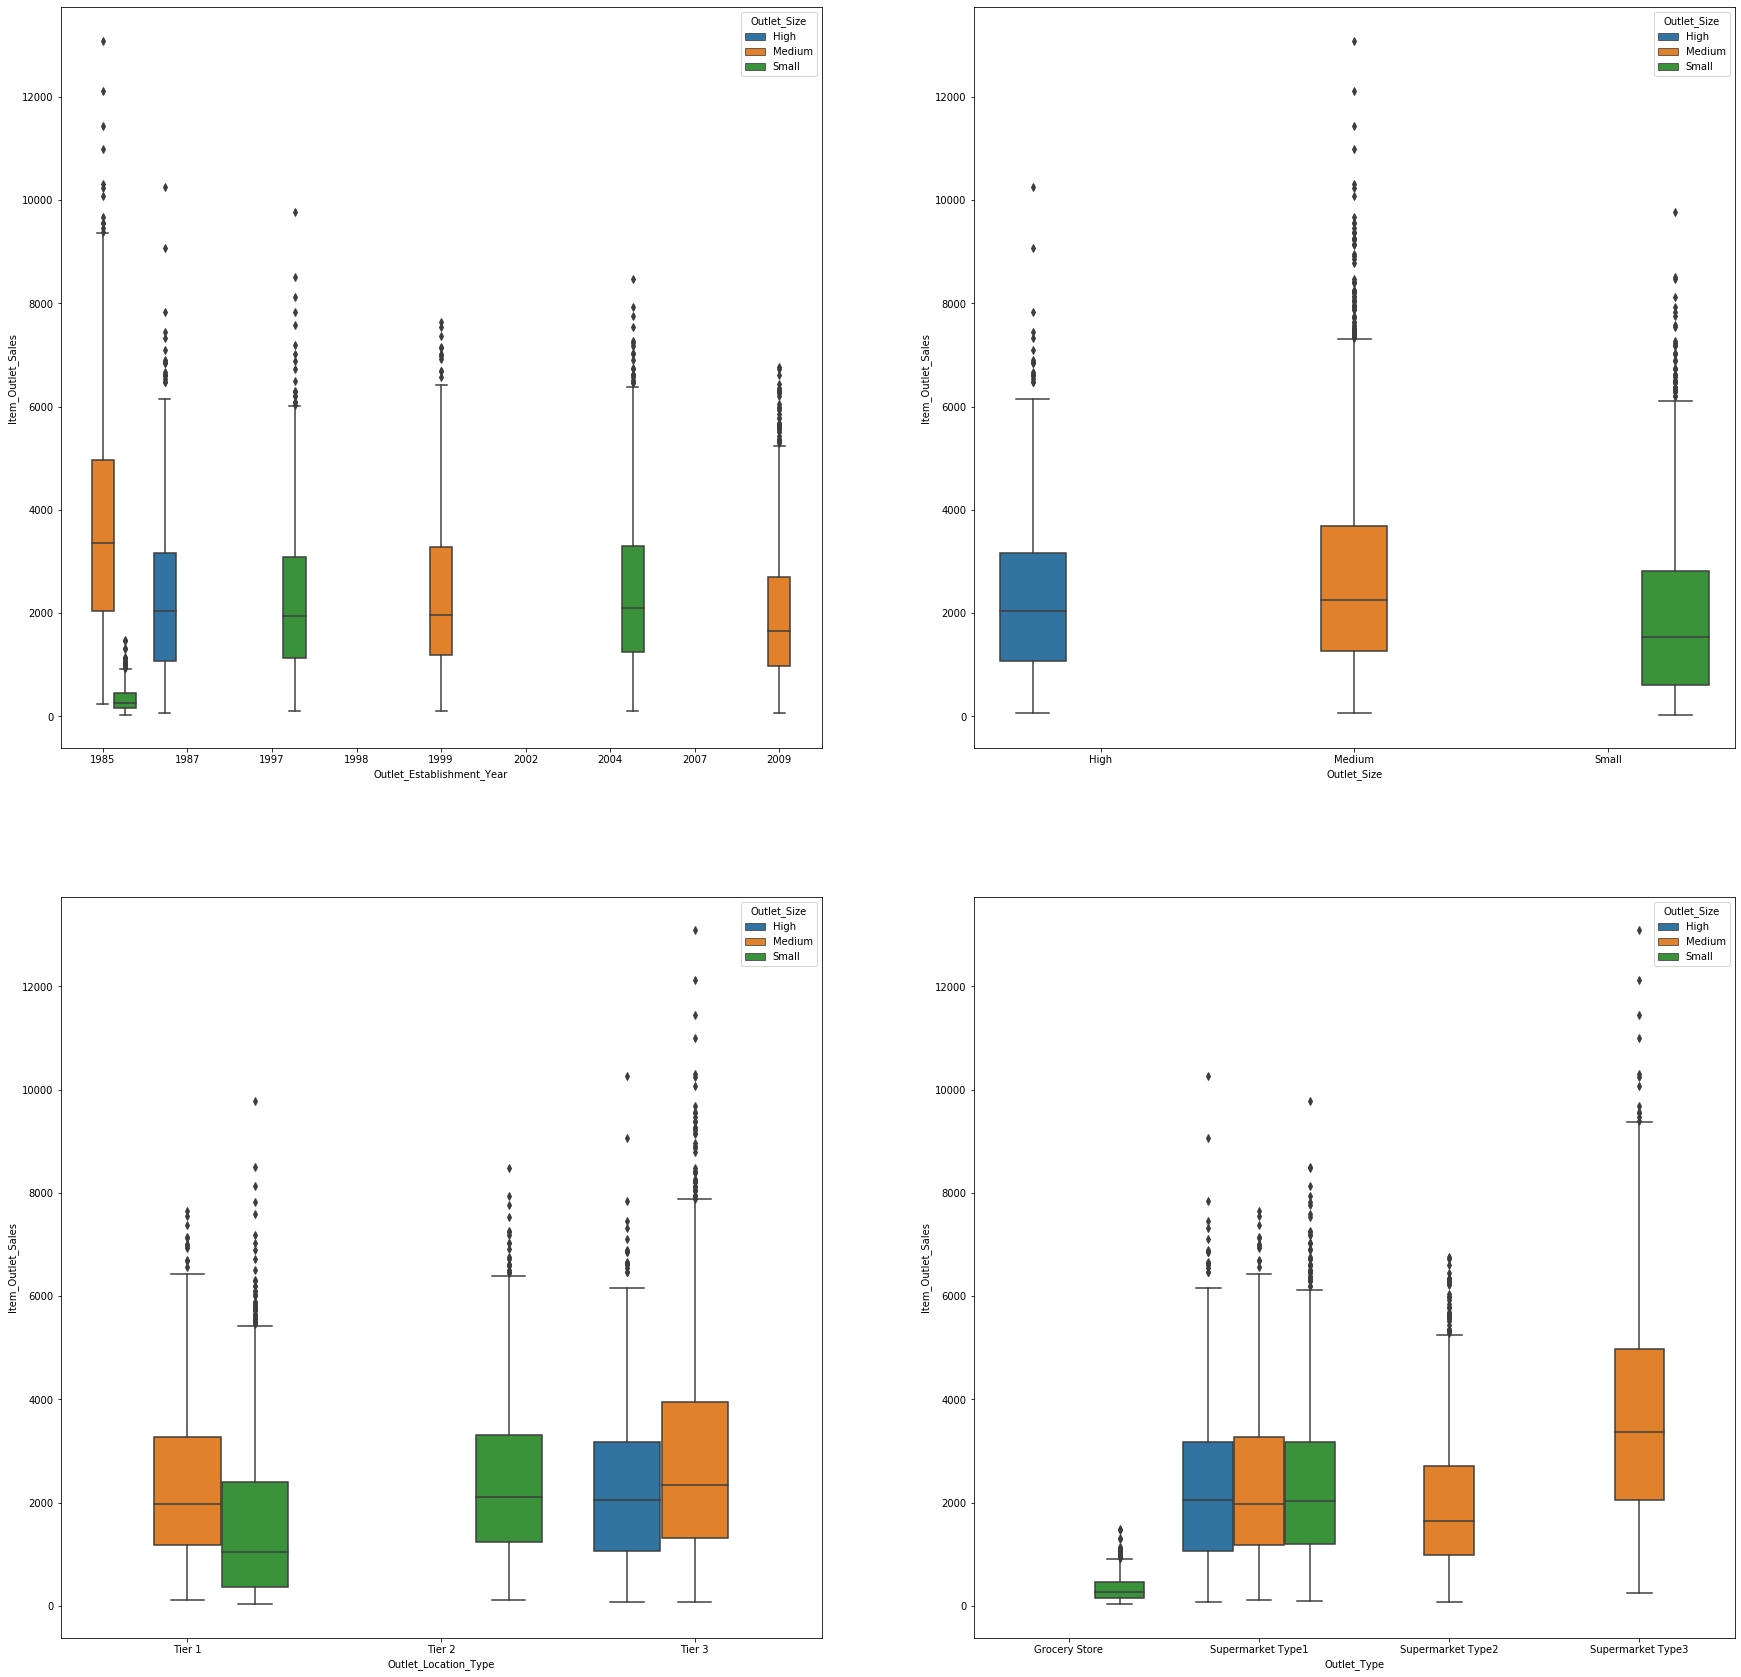

In [376]:
fig,axes=plt.subplots(2,2,figsize=(30,30))
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,0],data=df_train_sales)
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[0,1],data=df_train_sales)
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,0],data=df_train_sales)
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',hue='Outlet_Size',ax=axes[1,1],data=df_train_sales)

In [377]:
data=df_train_sales[attributes]

In [378]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_MRP                   8523 non-null   category
 1   Outlet_Type                8523 non-null   category
 2   Outlet_Location_Type       8523 non-null   category
 3   Outlet_Size                6113 non-null   category
 4   Outlet_Establishment_Year  8523 non-null   int64   
 5   Outlet_Identifier          8523 non-null   category
 6   Item_Type                  8523 non-null   category
 7   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(6), float64(1), int64(1)
memory usage: 185.0 KB


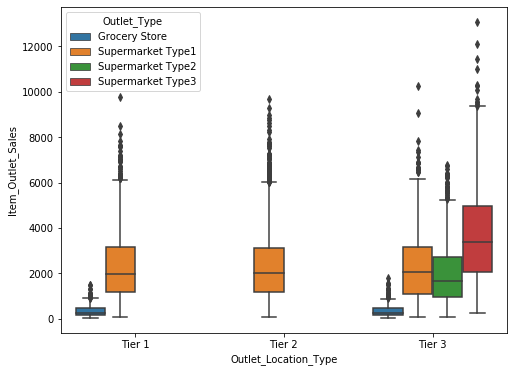

In [379]:
fig,axes=plt.subplots(1,1,figsize=(8,6))
sns.boxplot(y='Item_Outlet_Sales',hue='Outlet_Type',x='Outlet_Location_Type',data=data)

In [380]:
data[data.Outlet_Size.isnull()]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
8,b,Supermarket Type1,Tier 2,NaN,2002,OUT045,Frozen Foods,1076.5986
9,c,Supermarket Type1,Tier 2,NaN,2007,OUT017,Frozen Foods,4710.5350
25,a,Supermarket Type1,Tier 2,NaN,2007,OUT017,Household,838.9080
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
...,...,...,...,...,...,...,...,...
8502,d,Supermarket Type1,Tier 2,NaN,2002,OUT045,Household,3020.0688
8508,c,Supermarket Type1,Tier 2,NaN,2002,OUT045,Fruits and Vegetables,2587.9646
8509,d,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,424.7804
8514,a,Supermarket Type1,Tier 2,NaN,2002,OUT045,Canned,468.7232



One thing to observe is 

when OUTLET_TYPE = supermarket type 1 and OUTLET_LOCATION_TYPE is Tier 2 then outlet size is null 

furthermore

when OUTLET_TYPE = Grocery store and 
OUTLET_LOCATION_TYPE is Tier 3 then outlet size is always null

In [381]:
data.groupby('Outlet_Type').get_group('Grocery Store')['Outlet_Location_Type'].value_counts()

Tier 3    555
Tier 1    528
Tier 2      0
Name: Outlet_Location_Type, dtype: int64

In [382]:
data.groupby('Outlet_Type').get_group('Grocery Store')

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
3,c,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,732.3800
23,b,Grocery Store,Tier 1,Small,1985,OUT019,Baking Goods,214.3876
28,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,178.4344
29,a,Grocery Store,Tier 1,Small,1985,OUT019,Canned,125.8362
30,a,Grocery Store,Tier 3,NaN,1998,OUT010,Dairy,163.7868
...,...,...,...,...,...,...,...,...
8473,c,Grocery Store,Tier 3,NaN,1998,OUT010,Hard Drinks,431.4384
8480,c,Grocery Store,Tier 1,Small,1985,OUT019,Snack Foods,459.4020
8486,a,Grocery Store,Tier 3,NaN,1998,OUT010,Fruits and Vegetables,45.2744
8490,c,Grocery Store,Tier 1,Small,1985,OUT019,Fruits and Vegetables,487.3656


In [383]:
data.groupby(['Outlet_Location_Type','Outlet_Type'])['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Type        Outlet_Size
Tier 1                Grocery Store      Small          528
                      Supermarket Type1  Medium         930
                                         Small          930
Tier 2                Supermarket Type1  Small          930
Tier 3                Supermarket Type1  High           932
                      Supermarket Type2  Medium         928
                      Supermarket Type3  Medium         935
Name: Outlet_Size, dtype: int64

In [384]:
(data.Outlet_Identifier=='OUT010').value_counts()

False    7968
True      555
Name: Outlet_Identifier, dtype: int64

In [385]:
data.groupby('Outlet_Size').Outlet_Identifier.value_counts()

Outlet_Size  Outlet_Identifier
High         OUT013               932
Medium       OUT027               935
             OUT049               930
             OUT018               928
Small        OUT035               930
             OUT046               930
             OUT019               528
Name: Outlet_Identifier, dtype: int64


Tier 1 have small and medium size shop. Tier 2 have small and (missing 1) type shop. Tier 3 have 2-medium and 1 high and (missing 2) shop


Tier 2 will have medium size shop in missing 1 and Tier 3 will be high or medium size shop

In [386]:
def func(x):
    if x.Outlet_Identifier == 'OUT010' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT045' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT017' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT013' :
        x.Outlet_Size == 'High'
    elif x.Outlet_Identifier == 'OUT046' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT035' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT019' :
        x.Outlet_Size == 'Small'
    elif x.Outlet_Identifier == 'OUT027' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT049' :
        x.Outlet_Size == 'Medium'
    elif x.Outlet_Identifier == 'OUT018' :
        x.Outlet_Size == 'Medium'
    return(x)

In [387]:
data.Outlet_Size=data.apply(func,axis=1)

# Now lets checkout OUTLIERS

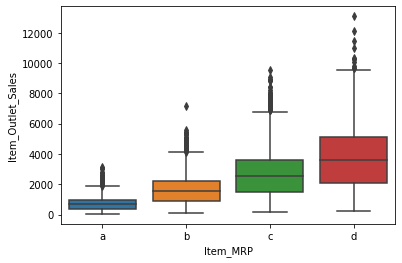

In [388]:
sns.boxplot(x='Item_MRP',y='Item_Outlet_Sales',data=data)

In [389]:
data[data.Item_MRP=='b'].Item_Outlet_Sales.max()

7158.6816

In [390]:
data[data.Item_Outlet_Sales==7158.6816]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
7737,d,Supermarket Type3,Tier 3,d,1985,OUT027,Breads,7158.6816
7796,b,Supermarket Type3,Tier 3,b,1985,OUT027,Household,7158.6816


In [391]:
data=data.drop(index=7796)
data.groupby('Item_MRP').get_group('b')['Item_Outlet_Sales'].max()

5582.733

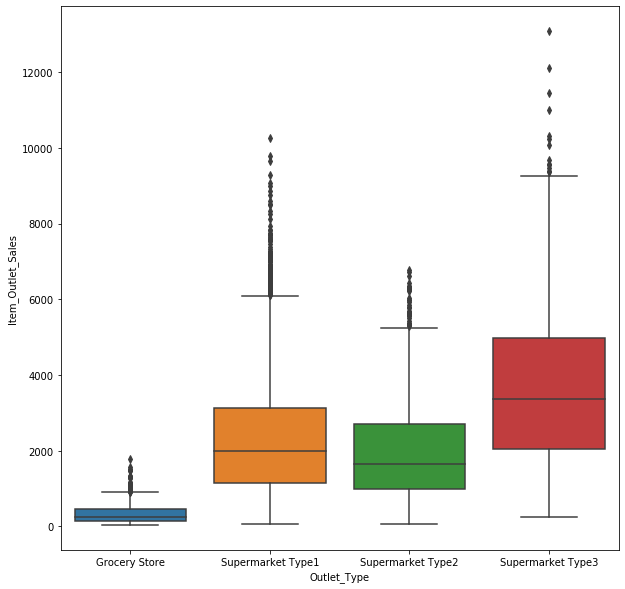

In [392]:
plt.figure(figsize=(10,10))
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)

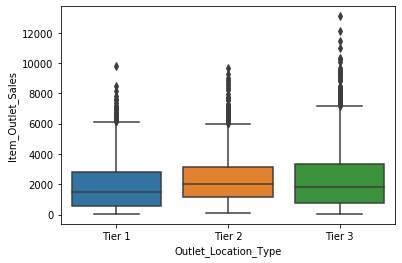

In [393]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df_train_sales)

In [394]:
data[df_train_sales.Outlet_Location_Type=='Tier 1'].Item_Outlet_Sales.max()

9779.9362

In [395]:
data[df_train_sales['Item_Outlet_Sales']==9779.9362]

,Item_MRP,Outlet_Type,Outlet_Location_Type,Outlet_Size,Outlet_Establishment_Year,Outlet_Identifier,Item_Type,Item_Outlet_Sales
4289,d,Supermarket Type1,Tier 1,d,1997,OUT046,Health and Hygiene,9779.9362


In [396]:
data=df_train_sales.drop(index=4289)

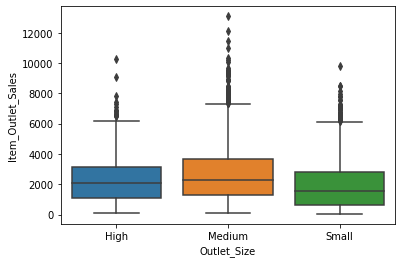

In [397]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df_train_sales)

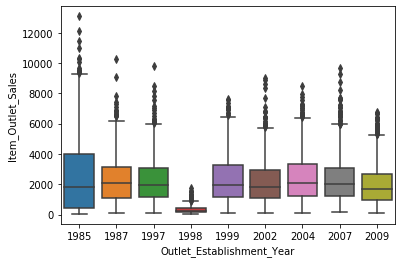

In [398]:
sns.boxplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',data=df_train_sales)

In [399]:
df_train_sales.Outlet_Establishment_Year=df_train_sales.Outlet_Establishment_Year.astype('category')
df_train_sales_label=df_train_sales.Item_Outlet_Sales
df_train_sales_dummy=pd.get_dummies(data.iloc[:,0:6])

In [400]:
df_train_sales_dummy['Item_Outlet_Sales']=df_train_sales_label

In [401]:
df_train_sales_dummy.shape

(8522, 1587)

# Now we are ready to apply ML algorithms

In [402]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_train_sales_dummy,test_size=0.20,random_state=2019)
train.shape , test.shape

((6817, 1587), (1705, 1587))

In [403]:
train_label=train['Item_Outlet_Sales']
test_label=test['Item_Outlet_Sales']
del train['Item_Outlet_Sales']
del test['Item_Outlet_Sales']

# Applying Linear Regression

In [408]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train,train_label)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').